In [73]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

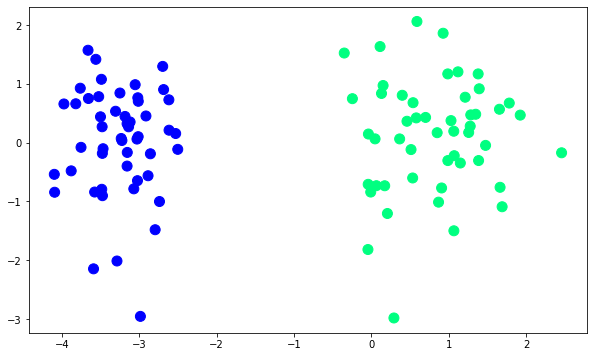

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train,y_train)


LogisticRegression()

In [78]:
y_pred = lor.predict(X_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))

[1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1]
1.0


In [79]:
print(lor.coef_)
print(lor.intercept_)

[[2.26463518 0.03361067]]
[2.99799687]


In [80]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [81]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b


In [108]:
class Logistic_GD:
  
  def __init__(self,lr=0.01,epochs=1000):
    self.lr = lr
    self.epochs = epochs
    self.coef_ = None
    self.intercept_ = None

  def sigmoid(self,z):
    return 1/(1 + np.exp(-z))
  
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    weights = np.ones(X_train.shape[1])

    
    for i in range(self.epochs):
        y_hat = self.sigmoid(np.dot(X_train,weights))
        weights = weights + self.lr*(np.dot((y_train-y_hat),X_train)/X_train.shape[0])
    
    self.coef_  = weights[1:]
    self.intercept_ = weights[0]

    print(self.coef_)
    print(self.intercept_)

   

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_ 





In [109]:
log = Logistic_GD(0.5,5000)

In [110]:
log.fit(X,y)

[4.83926872 0.21182255]
5.83338864905325


In [112]:
y_pred1 = log.predict(X_test)
y_pred2 = []
for i in y_pred1:
  if i>=0:y_pred2.append(1)
  else:y_pred2.append(0)

print(y_pred2)
print(accuracy_score(y_test,y_pred2))

[1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
1.0


In [113]:
m1 = -(log.coef_[0]/log.coef_[1])
b1 = -(log.intercept_/log.coef_[1])

In [114]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1


(-3.0, 2.0)

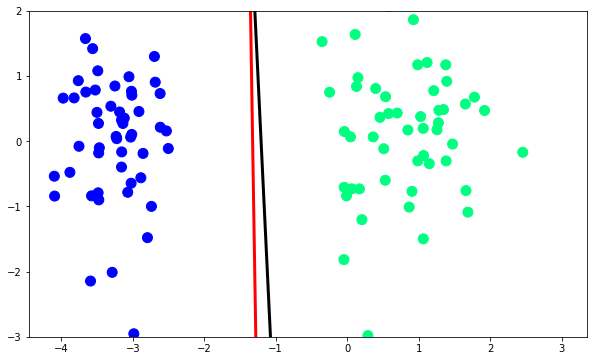

In [115]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)